## Retirement Challenge Resolution

- Task - Evaluate the impact of a new legislation on a simulation of how well prepared people are for retirement.

- Legislation: https://smartasset.com/retirement/savers-match-secure-2-0-act
--- 

#### Data dictionary: 

- **initial_age**: the age the person had when this the simulation started;
- **weight**: How many persons of the population this head of household represent;
- **income**: The annual gross income of the individual;
- **family_kind**: 1 = Husband-Wife, 2 = Male-Led, 3 = Female-Led;
- **race**: 1= White, 2 = Black, 3 = Hispanic, 4 = Other;
- **marital_status**: 1 = Married, 2 = Widowed, 3 = Divorced, 4 = Separated, 5 = Never married;
- **annual_contribution** (as % of income): What % of the current income the individuals contribute to retirement accounts;
- **accumulated_capital**: At this person’s death, the resulting balance considering all its incomes and expenses, in 2020 US dollars. If it is greater than or equal zero, it means this person was able to afford his retirement, if it is lower than zero, it means this person was not able to afford his retirement.

In [4]:
# loadings librarys

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# functions

from functions_eda import get_savers_match_benefit_total
from functions_graphs import plot_combined_chart

In [2]:
# reading the data

df = pd.read_csv('data.csv', index_col=0)
df.head() 

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income
0,57,616,2,1,3,-153263.200759,0.23,42658.02
1,45,591,1,1,1,161474.307306,0.24,248327.61
2,59,613,1,1,1,14209.331170,0.09,24371.94
3,62,656,1,1,1,-77270.897162,0.17,48788.04
4,45,567,2,1,5,282353.182490,0.22,47808.66


In [ ]:
df.info()

In [ ]:
# checking for duplicate data
df.duplicated().sum()

- In the case of a project that aims to assess the impacts of a new retirement law on the US population, it is necessary to analyze the distribution of the population in terms of race and family type, in order to understand the profile of this taxpayer and how the new policy can impact each of these groups. Thus, firstly, the distribution in the dataset of each type will be checked and only then will the impact of this new law on taxpayers' retirement be calculated.

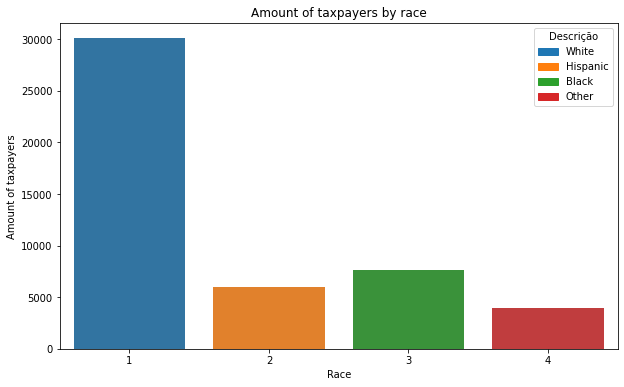

In [11]:
plt.figure(figsize=(10, 6))

race_counts = df['race'].value_counts()

# barplot
ax = sns.barplot(x=race_counts.index, y=race_counts.values)
plt.title('Amount of taxpayers by race')
plt.xlabel('Race')
plt.ylabel('Amount of taxpayers')

# mapping legend
def map_race_label(race):
    if race == 1:
        return 'White'
    elif race == 2:
        return 'Black'
    elif race == 3:
        return 'Hispanic'
    elif race == 4:
        return 'Other'
    else:
        return ''

# Creating legend
legend_labels = [map_race_label(race) for race in race_counts.index]
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in sns.color_palette()[:4]]
plt.legend(legend_handles, legend_labels, title='Descrição')
plt.show()

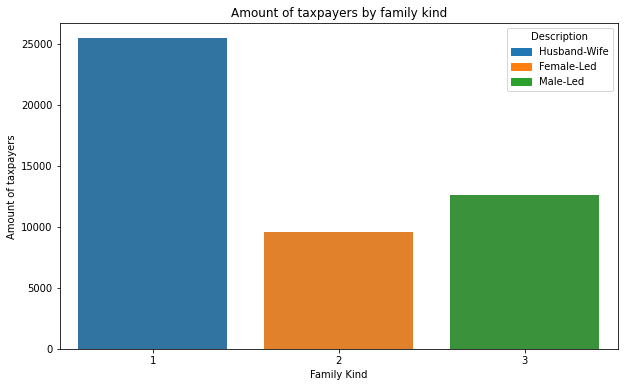

In [12]:
plt.figure(figsize=(10, 6))

family_kind_counts = df['family_kind'].value_counts()

ax = sns.barplot(x=family_kind_counts.index, y=family_kind_counts.values)
plt.title('Amount of taxpayers by family kind')
plt.xlabel('Family Kind')
plt.ylabel('Amount of taxpayers')

# mapping legend
def map_family_kind_label(family_kind):
    if family_kind == 1:
        return 'Husband-Wife'
    elif family_kind == 2:
        return 'Male-Led'
    elif family_kind == 3:
        return 'Female-Led'
    else:
        return ''

# Creating legend
legend_labels = [map_family_kind_label(family_kind) for family_kind in family_kind_counts.index]
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in sns.color_palette()[:len(family_kind_counts)]]
plt.legend(legend_handles, legend_labels, title='Description')
plt.show()


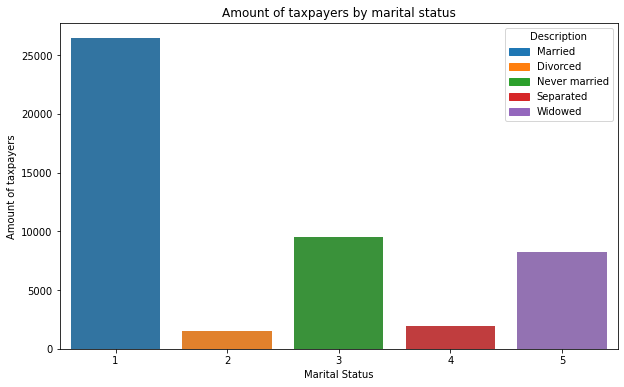

In [13]:
plt.figure(figsize=(10, 6))

marital_status_counts = df['marital_status'].value_counts()

ax = sns.barplot(x=marital_status_counts.index, y=marital_status_counts.values)
plt.title('Amount of taxpayers by marital status')
plt.xlabel('Marital Status')
plt.ylabel('Amount of taxpayers')

# mapping legend
def map_marital_status_label(marital_status):
    if marital_status == 1:
        return 'Married'
    elif marital_status == 2:
        return 'Widowed'
    elif marital_status == 3:
        return 'Divorced'
    elif marital_status == 4:
        return 'Separated'
    elif marital_status == 5:
        return 'Never married'
    else:
        return ''

# Creating legend
legend_labels = [map_marital_status_label(status) for status in marital_status_counts.index]
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in sns.color_palette()[:len(marital_status_counts)]]
plt.legend(legend_handles, legend_labels, title='Description')
plt.show()


In [5]:
# new dataframe with saversmatch calcs 
df_final = get_savers_match_benefit_total(df, 2020)
df_final.head()

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,total_saversmatch_contribution
0,57,616,2,1,3,-153263.200759,0.23,42658.02,0.0
1,45,591,1,1,1,161474.307306,0.24,248327.61,0.0
2,59,613,1,1,1,14209.331170,0.09,24371.94,0.0
3,62,656,1,1,1,-77270.897162,0.17,48788.04,0.0
4,45,567,2,1,5,282353.182490,0.22,47808.66,0.0


In [8]:
# describe the total savers match contribution 
df_final.total_saversmatch_contribution.describe()

count     47626.000000
mean       9068.903193
std       20488.627181
min           0.000000
25%           0.000000
50%           0.000000
75%        5000.000000
max      120000.000000
Name: total_saversmatch_contribution, dtype: float64

In [9]:
# new accumulated capital
df_final['new_accumulated_capital'] = df_final.accumulated_capital + df_final.total_saversmatch_contribution
df_final.head()

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,total_saversmatch_contribution,new_accumulated_capital
0,57,616,2,1,3,-153263.200759,0.23,42658.02,0.0,-153263.200759
1,45,591,1,1,1,161474.307306,0.24,248327.61,0.0,161474.307306
2,59,613,1,1,1,14209.331170,0.09,24371.94,0.0,14209.331170
3,62,656,1,1,1,-77270.897162,0.17,48788.04,0.0,-77270.897162
4,45,567,2,1,5,282353.182490,0.22,47808.66,0.0,282353.182490


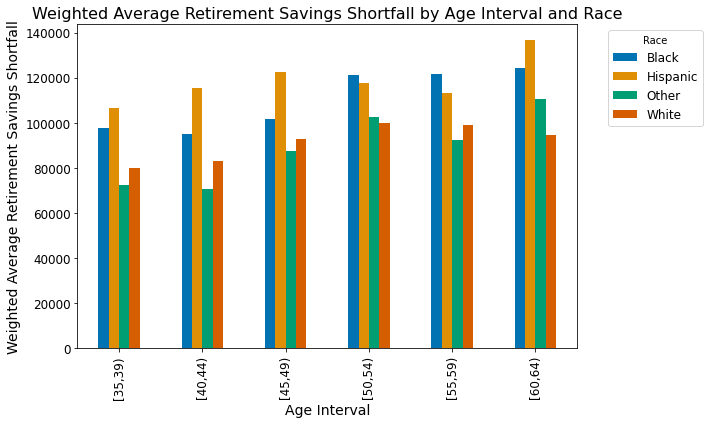

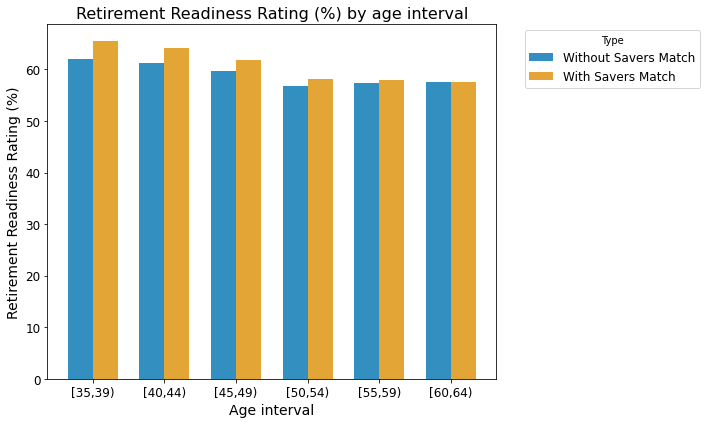

In [10]:
# Weighted Average Retirement Savings Shortfall by Race and Age Cohort and Impact in percentage points of the new scenario into the Retirement Readiness Rating, per Age Cohort.
plot_combined_chart(df_final)

In [ ]:
# creating a new .csv
df_final.to_csv('new_scenario.csv')